In [19]:
# import libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [20]:
# Setting the display options for pandas
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

# Explorary data analysis:

In [21]:
df = pd.read_csv("../data/samples/sample.csv")

In [22]:
df.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2022-07-17,Alaska Airlines Inc.,JFK,PDX,False,False,1145,1139.0,0.0,-6.0,1442.0,0.0,324.0,365.0,363.0,2454.0,2022,3,7,17,7,AS,AS,19930,AS,857,AS,19930,AS,N281AK,857,12478,1247805,31703,"New York, NY",NY,36,New York,22,14057,1405702,34057,"Portland, OR",OR,41,Oregon,92,0.0,-1.0,1100-1159,31.0,1210.0,1434.0,8.0,1450,-8.0,0.0,-1.0,1400-1459,10,0
1,2022-05-24,Southwest Airlines Co.,AUS,FLL,False,False,720,738.0,18.0,18.0,1107.0,7.0,135.0,160.0,149.0,1105.0,2022,2,5,24,2,WN,WN,19393,WN,1771,WN,19393,WN,N487WN,1771,10423,1042302,30423,"Austin, TX",TX,48,Texas,74,11697,1169706,32467,"Fort Lauderdale, FL",FL,12,Florida,33,1.0,1.0,0700-0759,11.0,749.0,1104.0,3.0,1100,7.0,0.0,0.0,1100-1159,5,0
2,2022-06-09,SkyWest Airlines Inc.,LAX,RNO,False,False,949,947.0,0.0,-2.0,1109.0,0.0,65.0,91.0,82.0,391.0,2022,2,6,9,4,DL,DL_CODESHARE,19790,DL,3501,OO,20304,OO,N298SY,3501,12892,1289208,32575,"Los Angeles, CA",CA,6,California,91,14570,1457002,34570,"Reno, NV",NV,32,Nevada,85,0.0,-1.0,0900-0959,10.0,957.0,1102.0,7.0,1120,-11.0,0.0,-1.0,1100-1159,2,0
3,2022-05-08,American Airlines Inc.,DCA,CLT,False,False,650,640.0,0.0,-10.0,821.0,0.0,64.0,93.0,101.0,331.0,2022,2,5,8,7,AA,AA,19805,AA,400,AA,19805,AA,N714US,400,11278,1127805,30852,"Washington, DC",VA,51,Virginia,38,11057,1105703,31057,"Charlotte, NC",NC,37,North Carolina,36,0.0,-1.0,0600-0659,30.0,710.0,814.0,7.0,823,-2.0,0.0,-1.0,0800-0859,2,0
4,2022-06-09,JetBlue Airways,DCA,RSW,False,False,1304,1321.0,17.0,17.0,1604.0,17.0,141.0,163.0,163.0,892.0,2022,2,6,9,4,B6,B6,20409,B6,481,B6,20409,B6,N307JB,481,11278,1127805,30852,"Washington, DC",VA,51,Virginia,38,14635,1463502,31714,"Fort Myers, FL",FL,12,Florida,33,1.0,1.0,1300-1359,16.0,1337.0,1558.0,6.0,1547,17.0,1.0,1.0,1500-1559,4,0


## General information about the data

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652531 entries, 0 to 652530
Data columns (total 61 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   FlightDate                               652531 non-null  object 
 1   Airline                                  652531 non-null  object 
 2   Origin                                   652531 non-null  object 
 3   Dest                                     652531 non-null  object 
 4   Cancelled                                652531 non-null  bool   
 5   Diverted                                 652531 non-null  bool   
 6   CRSDepTime                               652531 non-null  int64  
 7   DepTime                                  633490 non-null  float64
 8   DepDelayMinutes                          633476 non-null  float64
 9   DepDelay                                 633476 non-null  float64
 10  ArrTime                         

In [24]:
print("Data Description:")
print(df.describe(include='all'))

Data Description:
        FlightDate                 Airline  Origin    Dest Cancelled Diverted  \
count       652531                  652531  652531  652531    652531   652531   
unique         182                      21     375     373         2        2   
top     2022-06-24  Southwest Airlines Co.     ATL     ATL     False    False   
freq          4259                  110737   30261   30143    632998   650887   
mean           NaN                     NaN     NaN     NaN       NaN      NaN   
std            NaN                     NaN     NaN     NaN       NaN      NaN   
min            NaN                     NaN     NaN     NaN       NaN      NaN   
25%            NaN                     NaN     NaN     NaN       NaN      NaN   
50%            NaN                     NaN     NaN     NaN       NaN      NaN   
75%            NaN                     NaN     NaN     NaN       NaN      NaN   
max            NaN                     NaN     NaN     NaN       NaN      NaN   

         

In [25]:
print("Data Shape:")

# Number of rows 
print("Number of rows: ", df.shape[0])

# Number of columns
print("Number of columns: ", df.shape[1])

Data Shape:
Number of rows:  652531
Number of columns:  61


## Features exploration

In [26]:
print("List of features names:")
print(df.columns)


List of features names:
Index(['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted',
       'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime',
       'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime',
       'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners',
       'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline',
       'Flight_Number_Marketing_Airline', 'Operating_Airline',
       'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline',
       'Tail_Number', 'Flight_Number_Operating_Airline', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName',
       'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepDel15',
       'DepartureDelayGroups

In [27]:
print("Data types of features:")
df_datatypes = (df.dtypes.unique())
for datatype in df_datatypes:
    print(f"Features with data type {datatype}: {df.select_dtypes(include=[datatype]).columns}")

Data types of features:
Features with data type object: Index(['FlightDate', 'Airline', 'Origin', 'Dest', 'Marketing_Airline_Network',
       'Operated_or_Branded_Code_Share_Partners',
       'IATA_Code_Marketing_Airline', 'Operating_Airline',
       'IATA_Code_Operating_Airline', 'Tail_Number', 'OriginCityName',
       'OriginState', 'OriginStateName', 'DestCityName', 'DestState',
       'DestStateName', 'DepTimeBlk', 'ArrTimeBlk'],
      dtype='object')
Features with data type bool: Index(['Cancelled', 'Diverted'], dtype='object')
Features with data type int64: Index(['CRSDepTime', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'DOT_ID_Marketing_Airline', 'Flight_Number_Marketing_Airline',
       'DOT_ID_Operating_Airline', 'Flight_Number_Operating_Airline',
       'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID',
       'OriginStateFips', 'OriginWac', 'DestAirportID', 'DestAirportSeqID',
       'DestCityMarketID', 'DestStateFips', 'DestWac', 'CRSArrTime',

In [28]:
# Numeric features
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Categorical features
categorical_features = df.select_dtypes(include=['object']).nunique()[df.select_dtypes(include=['object']).nunique() < 15].index.tolist()

# Text features
text_features = df.select_dtypes(include=['object']).nunique()[df.select_dtypes(include=['object']).nunique() > 15].index.tolist()

print("Potential numeric features:", numeric_features)
print("Potential categorical features:", categorical_features)
print("Potential text features:", text_features)

Potential numeric features: ['CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime', 'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime', 'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'DOT_ID_Marketing_Airline', 'Flight_Number_Marketing_Airline', 'DOT_ID_Operating_Airline', 'Flight_Number_Operating_Airline', 'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'OriginStateFips', 'OriginWac', 'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestStateFips', 'DestWac', 'DepDel15', 'DepartureDelayGroups', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrDelay', 'ArrDel15', 'ArrivalDelayGroups', 'DistanceGroup', 'DivAirportLandings']
Potential categorical features: ['Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners', 'IATA_Code_Marketing_Airline']
Potential text features: ['FlightDate', 'Airline', 'Origin', 'Dest', 'Operating_Airline', 'IATA_Code_Operating_Airline', 'Tail_Number', 'OriginCi

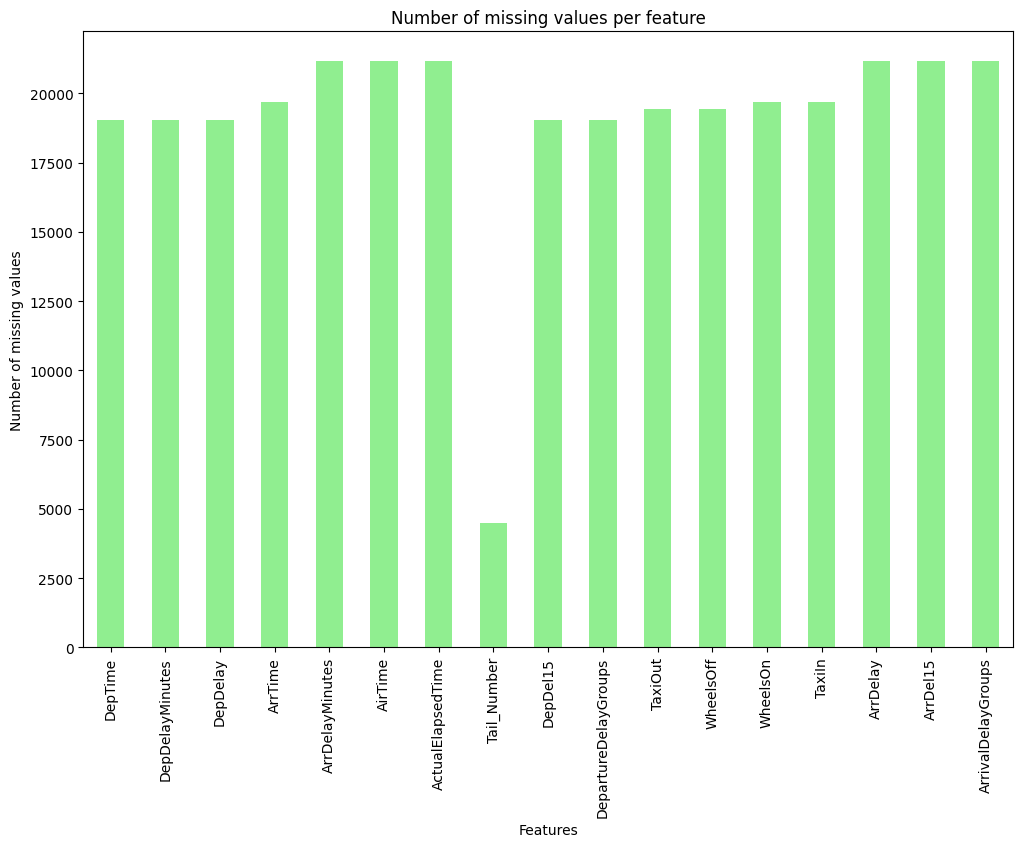

In [29]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]

missing_values.plot(kind='bar', figsize=(12,8), color='lightgreen')
plt.title('Number of missing values per feature')
plt.xlabel('Features')
plt.ylabel('Number of missing values')
plt.show()

For this list of features we decided to use mean imputation technique, because it is a simple and commonly used method to handle missing data. Here are some of its advantages:

1) Ease of Implementation: Mean imputation is straightforward to understand and easy to implement. It doesn't require complex statistical knowledge.
2) Preserves Mean: The mean of the dataset remains the same before and after imputation, which is useful for statistical analyses that rely on the mean.
3) Fast and Efficient: Mean imputation is computationally efficient, making it a good choice for large datasets.
4) Less Data Loss: Unlike listwise deletion, which removes any instance that has at least one missing value, mean imputation preserves all instances by replacing missing values.

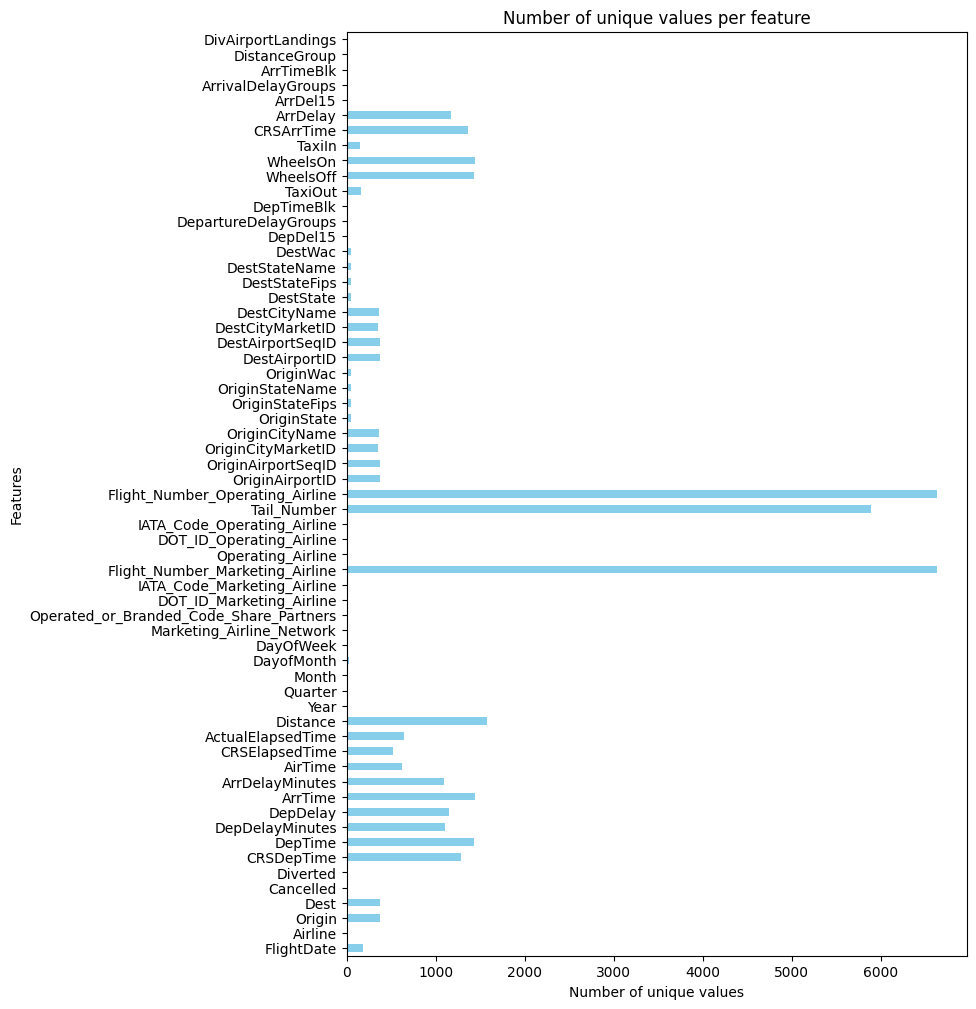

In [30]:
unique_values = df.nunique()

unique_values.plot(kind='barh', figsize=(8,12), color='skyblue')
plt.title('Number of unique values per feature')
plt.xlabel('Number of unique values')
plt.ylabel('Features')
plt.show()

In [31]:
unique_values = df.nunique()
print(unique_values)

FlightDate                                  182
Airline                                      21
Origin                                      375
Dest                                        373
Cancelled                                     2
Diverted                                      2
CRSDepTime                                 1282
DepTime                                    1427
DepDelayMinutes                            1110
DepDelay                                   1152
ArrTime                                    1440
ArrDelayMinutes                            1096
AirTime                                     622
CRSElapsedTime                              525
ActualElapsedTime                           649
Distance                                   1573
Year                                          1
Quarter                                       3
Month                                         6
DayofMonth                                   31
DayOfWeek                               

In [32]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [43]:
features_to_drop = [
    "OriginAirportSeqID", "OriginCityMarketID", "OriginCityName", "OriginState", 
    "OriginStateFips", "OriginStateName", "OriginWac", "DestAirportSeqID", 
    "DestCityMarketID", "DestCityName", "DestState", "DestStateFips", 
    "DestStateName", "DestWac", "Year", "Quarter", "Month", "DayofMonth", 
    "DayOfWeek", "DepDel15", "DepartureDelayGroups", "DepTimeBlk", "TaxiOut", 
    "TaxiIn", "WheelsOff", "WheelsOn", "ArrDel15", "ArrivalDelayGroups", 
    "ArrTimeBlk", "DistanceGroup", "DivAirportLandings", "Origin", "Dest", 
    "Diverted", "DepDelayMinutes", "ArrDelayMinutes", "Marketing_Airline_Network", 
    "Operated_or_Branded_Code_Share_Partners", "DOT_ID_Marketing_Airline", 
    "IATA_Code_Marketing_Airline", "Flight_Number_Marketing_Airline", 
    "DOT_ID_Operating_Airline", "IATA_Code_Operating_Airline", 
    "Flight_Number_Operating_Airline","Airline","CRSDepTime","CRSArrTime","CRSElapsedTime"
]

df_new = df.drop(features_to_drop, axis=1)
print(len(df_new.columns))

13


* Numeric features: ['DepTime', 'DepDelay', 'ArrTime', 'AirTime', 'ActualElapsedTime', 'Distance', 'OriginAirportID', 'DestAirportID', 'ArrDelay','FlightDate',Cancelled]
* Categorical features: ['Operating_Airline']
* Text features: ['Tail_Number']

DepTime, AirTime -> minutes 
FlightDate - object -> date -> since_epoch
Operating_Airline - object -> one hot encoding
Tail_Numbe - object -> feature hashing 